In [191]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

In [192]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Linear classification using SVM 

In [193]:
iris=datasets.load_iris()
X=iris["data"][:,(2,3)]#petal length,petal width
y=(iris["target"]==2).astype(np.float64)#Iris-Virginica

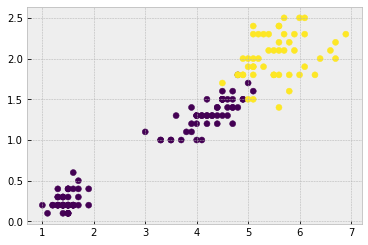

In [194]:
plt.scatter(X[:, 0], X[:, 1], c = y )
plt.show()

In [195]:
svm_clf=Pipeline((
                ("scaler",StandardScaler()),
                ("linear_svc",LinearSVC(C=1,loss="hinge")),
                ))

In [196]:
svm_clf.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

In [197]:
svm_clf.predict([[5.5, 1.7]])

array([ 1.])

In [198]:
svm_clf.predict([[3.5, 2]])

array([ 0.])

In [199]:
predictions = svm_clf.predict(X)

In [200]:
svm_clf1=Pipeline((
                ("scaler",StandardScaler()),
                ("linear_svc",LinearSVC(C=1000,loss="hinge")),
                ))

In [201]:
svm_clf1.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

In [202]:
predictions1 = svm_clf1.predict(X)

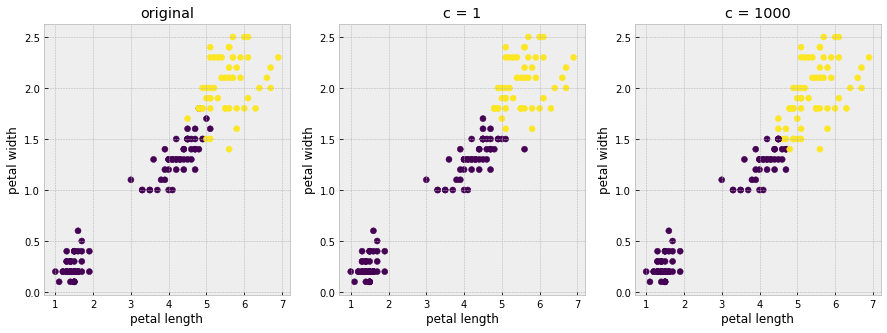

In [203]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c = y )
plt.title("original"), plt.xlabel("petal length"), plt.ylabel("petal width")
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c = predictions )
plt.title("c = 1"), plt.xlabel("petal length"), plt.ylabel("petal width")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c = predictions1 )
plt.title("c = 1000"), plt.xlabel("petal length"), plt.ylabel("petal width")
plt.show()

* 	A smaller	 C 	value	leads	to	a	wider	street	but	more	margin	violations.
* 	Using	a	high	 C 	value	the	classifier	makes	fewer	margin violations	but	ends	up	with	a	smaller	margin and may cause overfitting.

# Non linear classification

In [234]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [235]:
moons = make_moons(noise = 0.15, random_state=42)
X = moons[0]
y = moons[1]

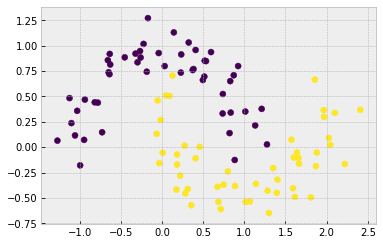

In [236]:
plt.scatter(X[:, 0], X[:, 1], c = y )
plt.show()

#####  One approach to handling nonlinear datasets is to add more features, such as polynomial features. 

In [237]:
polynomial_svm_clf=Pipeline((
                             ("poly_features", PolynomialFeatures(degree=3)),
                            ("scaler", StandardScaler()),
                            ("svm_clf", LinearSVC(C=10, loss="hinge"))))

In [238]:
polynomial_svm_clf.fit(X, y)

Pipeline(steps=(('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

In [239]:
pre = polynomial_svm_clf.predict(X)
pre

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1])

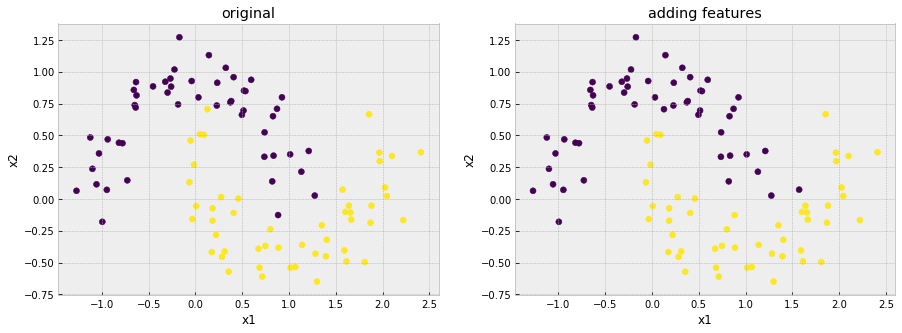

In [240]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c = y )
plt.title("original"), plt.xlabel("x1"), plt.ylabel("x2")
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c = pre )
plt.title("adding features"), plt.xlabel("x1"), plt.ylabel("x2")
plt.show()

#####  -->Here classification is done by adding more features(using polynomial features) 

-->Adding	polynomial	features	is	simple	to	implement	and	can	work	great	with	all	sorts	of
Machine	Learning	algorithms.

* At	a	low	polynomial	degree	it	cannot deal	with	very	complex	dataset

* A	high	polynomial	degree	it	creates	a	huge number	of	features,	making	the	model	too	slow.

# polynomial kernel

##### As high degree polynomial increases the no of features and makes the model slow, the same result(by adding polynomial features) can be obtained by using SVMs kernel trick  without actually adding the features

In [241]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=1, coef0=1, C=5))
 ))
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

In [242]:
pre1 = polynomial_svm_clf.predict(X)
pre1

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1])

In [244]:
poly_kernel_svm_clf1 = Pipeline((
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=100, coef0=1, C=5))
 ))
poly_kernel_svm_clf1.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=100, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

In [245]:
pre2 = polynomial_svm_clf1.predict(X)
pre2

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1])

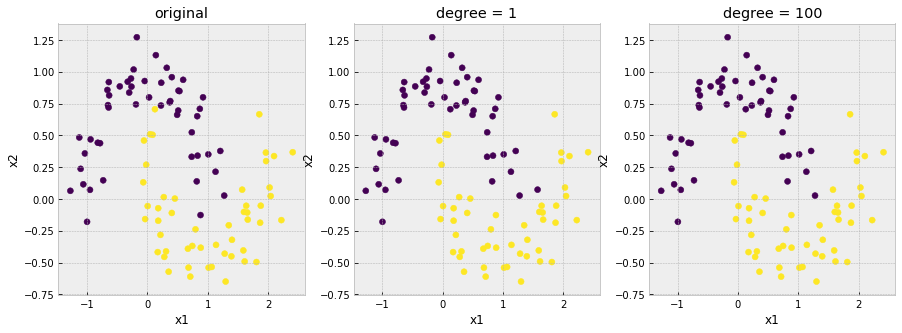

In [246]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c = y )
plt.title("original"), plt.xlabel("x1"), plt.ylabel("x2")
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c = pre1 )
plt.title("degree = 1"), plt.xlabel("x1"), plt.ylabel("x2")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c = pre2 )
plt.title("degree = 100"), plt.xlabel("x1"), plt.ylabel("x2")
plt.show()

* High polynomial degree results in overfitting of the model
* If the model is overfitting reduce the polynomial degree and if the model is underfitting increase the degree

# Gaussian rbl kernel

* Like	the	polynomial	features	method,	the	similarity	features	method	can	be	used to add additional features, but it	may	be	computationally	expensive	to	compute	allthe	additional	features,	especially	on	large	training	sets.	
* Once again using SVMs kernel trick	makes	it	possible	to	obtain	a	similar	result	as	if	you	had
added	many	similarity	features,	without	actually	having	to	add	them.

In [216]:
rbf_kernel_svm_clf=Pipeline((
                                ("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="rbf", gamma=1, C=0.001))
                                ))
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

In [217]:
pre3 = rbf_kernel_svm_clf.predict(X)
pre3

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0])

In [218]:
rbf_kernel_svm_clf1=Pipeline((
                                ("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="rbf", gamma=10, C=0.001))
                                ))
rbf_kernel_svm_clf1.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

In [219]:
pre4 = rbf_kernel_svm_clf1.predict(X)
pre4

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1])

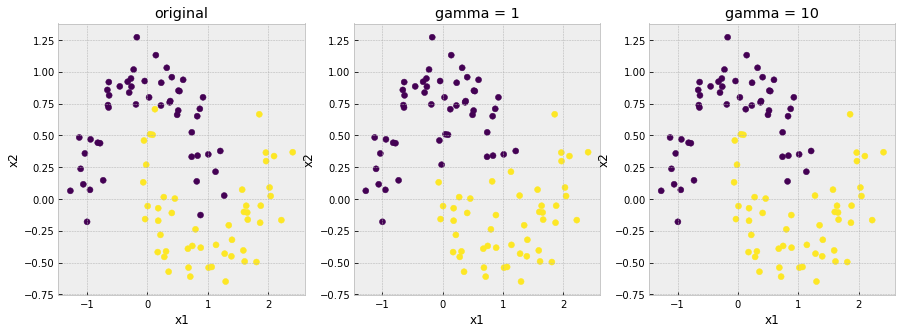

In [220]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c = y )
plt.title("original"), plt.xlabel("x1"), plt.ylabel("x2")
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c = pre3 )
plt.title("gamma = 1"), plt.xlabel("x1"), plt.ylabel("x2")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c = pre4 )
plt.title("gamma = 10"), plt.xlabel("x1"), plt.ylabel("x2")
plt.show()

* gamma is a regularization parameter
* Increase in gamma results in overfitting
* If the model is overfitting reduce the gamma value and if the model is underfitting increase it.